In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Загрузка данных
data = pd.read_csv("california_housing_train.csv")

In [ ]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

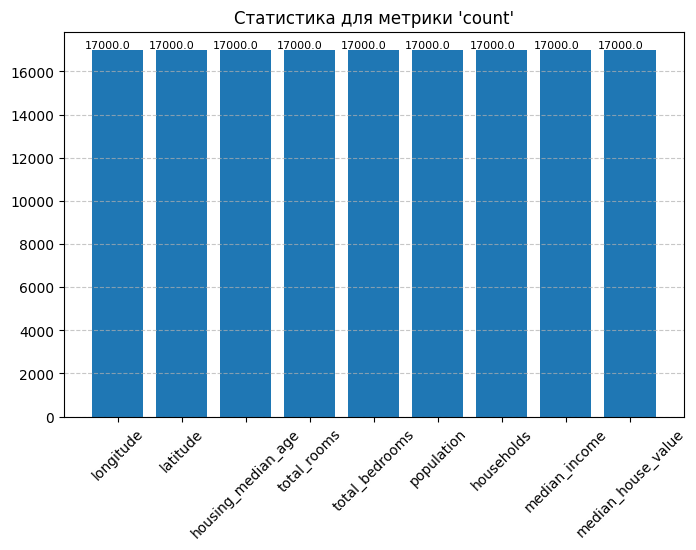

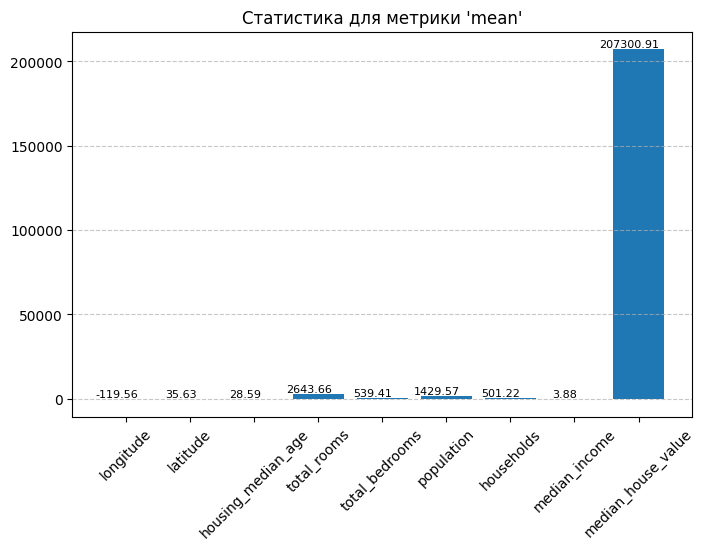

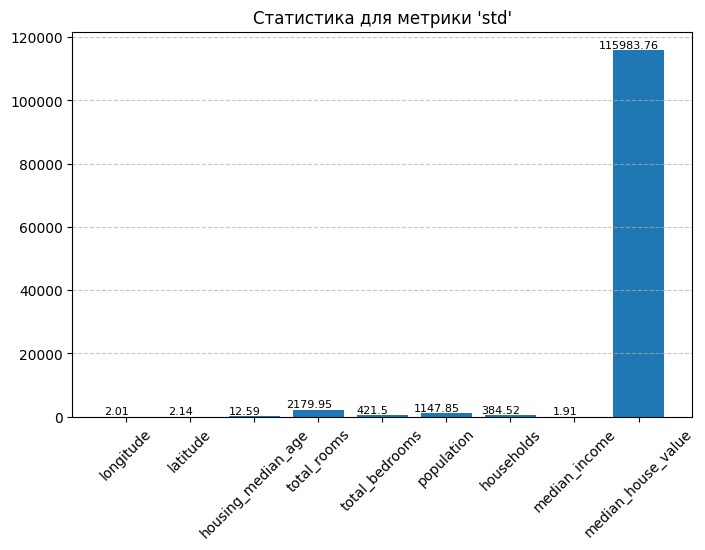

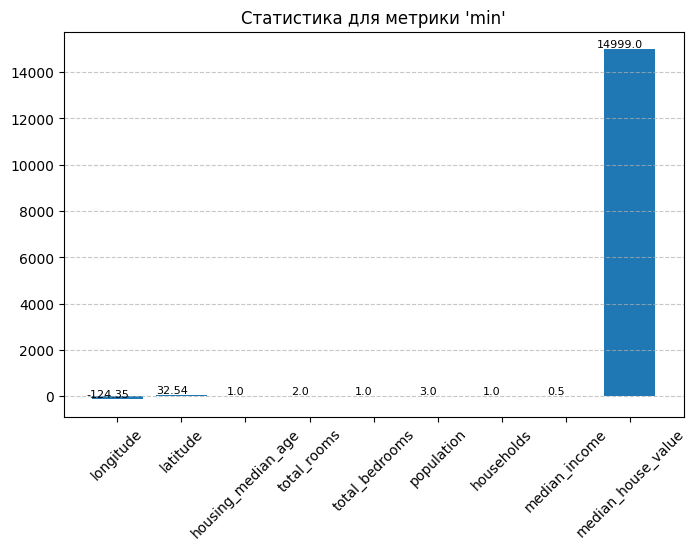

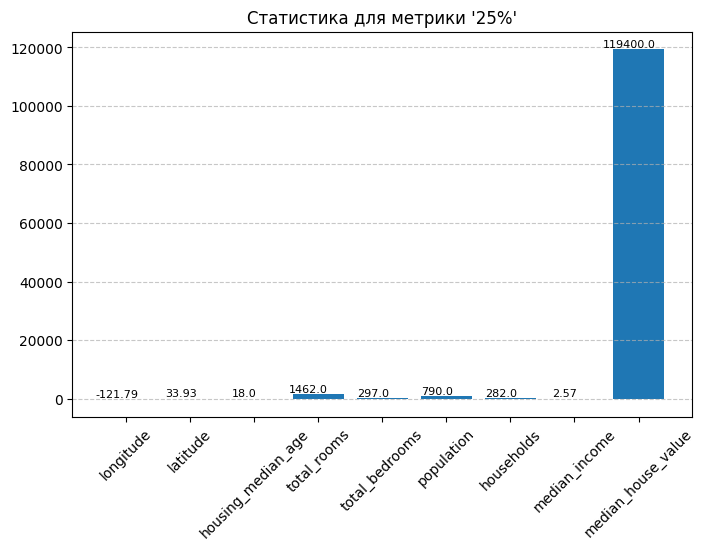

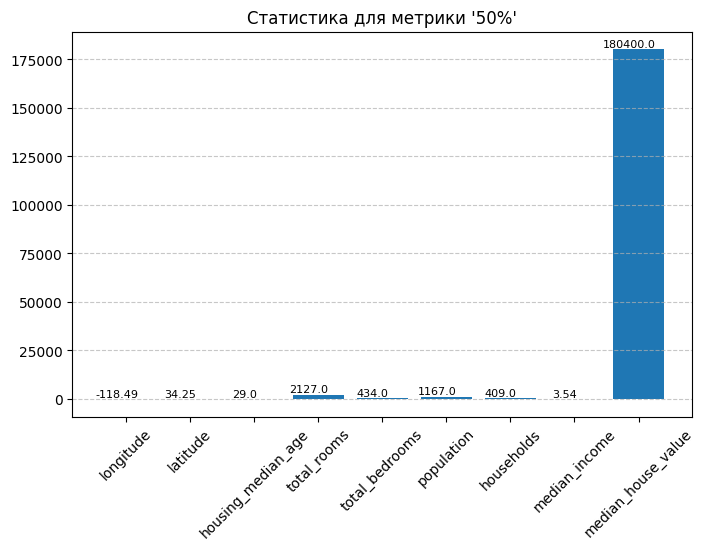

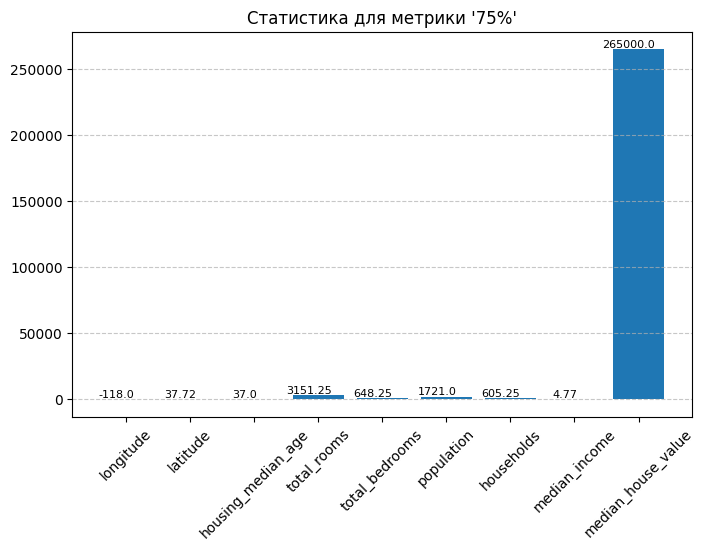

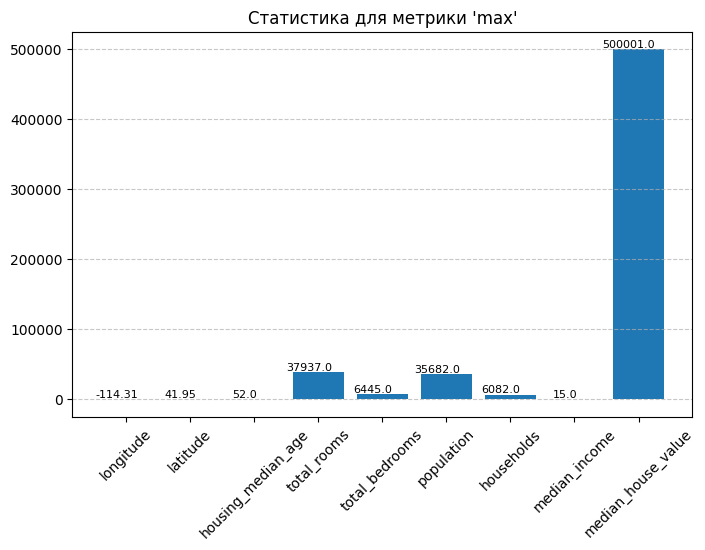

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [ ]:
# Получение статистики с помощью метода describe
statistics = data.describe()

# Визуализация статистики
for metric in statistics.index:
    plt.figure(figsize=(8, 5))
    plt.title(f"Статистика для метрики '{metric}'")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    bars = plt.bar(statistics.columns, statistics.loc[metric])

    # Добавляем значения к столбцам
    for bar, value in zip(bars, statistics.loc[metric]):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, value, str(round(value, 2)), ha='center', va='bottom', fontsize=8)

    plt.show()

# Вывод статистики
print(statistics)

In [ ]:
def normalize_data(data_frame: pd.DataFrame):
    min_max_scaler = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
    data_frame = data_frame.apply(min_max_scaler, axis=0)
    return data_frame

In [ ]:
data = normalize_data(data)
data.head()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1.000000  0.175345            0.274510     0.147885        0.198945   
1   0.984064  0.197662            0.352941     0.201608        0.294848   
2   0.975100  0.122210            0.313725     0.018927        0.026847   
3   0.974104  0.116897            0.254902     0.039515        0.052142   
4   0.974104  0.109458            0.372549     0.038276        0.050435   

   population  households  median_income  median_house_value  
0    0.028364    0.077454       0.068530            0.107012  
1    0.031559    0.075974       0.091040            0.134228  
2    0.009249    0.019076       0.079378            0.145775  
3    0.014350    0.037000       0.185639            0.120414  
4    0.017405    0.042921       0.098281            0.104125  


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125


In [ ]:
# Разделение данных на обучающий и тестовый наборы
train_ratio = 0.8
train_size = int(len(data) * train_ratio)
train_data = data[:train_size]
test_data = data[train_size:]

# Реализация линейной регрессии методом наименьших квадратов
def linear_regression(X, y):
    X = np.column_stack((np.ones(len(X)), X)) # Добавляем столбец с единицами для учета свободного члена
    coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # Вычисление оптимальных коэффициентов
    return coefficients


In [ ]:
# Оценка производительности модели с помощью коэффициента детерминации
def r_squared(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true) ** 2) # Сумма квадратов разницы между фактическими значениями и их средним значением
    ss_residual = np.sum((y_true - y_pred) ** 2) # Сумма квадратов остатков (разница между фактическими и предсказанными значениями)
    r2 = 1 - (ss_residual / ss_total) # Коэффициент детерминации
    return r2

In [ ]:
def predict(x_test, coefficients):
  return np.dot(np.column_stack((np.ones(len(x_test)), x_test)), coefficients)

In [ ]:
# Модель 1
X_train_model1 = train_data[['total_rooms', 'median_house_value']].values
y_train_model1 = train_data['median_income'].values

coefficients_model1 = linear_regression(X_train_model1, y_train_model1)

# Оценка производительности модели 1
X_test_model1 = test_data[['total_rooms', 'median_house_value']].values
y_test_model1 = test_data['median_income'].values

# Прогнозирование выбранного признака с использованием модели линейной регрессии.
y_pred_model1 = predict(X_test_model1, coefficients_model1)
r2_score_model1 = r_squared(y_test_model1, y_pred_model1)

print("Модель 1 - Коэффициент детерминации:", r2_score_model1)



Модель 1 - Коэффициент детерминации: 0.5010115975075965


In [ ]:
# Модель 2
X_train_model2 = train_data[['total_bedrooms', 'housing_median_age']].values
y_train_model2 = train_data['population'].values

coefficients_model2 = linear_regression(X_train_model2, y_train_model2)

# Оценка производительности модели 2
X_test_model2 = test_data[['total_bedrooms', 'housing_median_age']].values
y_test_model2 = test_data['population'].values

y_pred_model2 = predict(X_test_model2, coefficients_model2)
r2_score_model2 = r_squared(y_test_model2, y_pred_model2)

print("Модель 2 - Коэффициент детерминации:", r2_score_model2)

Модель 2 - Коэффициент детерминации: 0.7850572523197279


In [ ]:
# Модель 3
X_train_model3 = train_data[['latitude', 'households']].values
y_train_model3 = train_data['population'].values

coefficients_model3 = linear_regression(X_train_model3, y_train_model3)

# Оценка производительности модели 3
X_test_model3 = test_data[['latitude', 'households']].values
y_test_model3 = test_data['population'].values

y_pred_model3 = predict(X_test_model3, coefficients_model3)
r2_score_model3 = r_squared(y_test_model3, y_pred_model3)

print("Модель 3 - Коэффициент детерминации:", r2_score_model3)

Модель 3 - Коэффициент детерминации: 0.8078038872752078


In [ ]:
#ВАРИАНТ С SKLEARN. Для сравнения.


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train_model1 = train_data[['total_rooms', 'median_house_value']].values
y_train_model1 = train_data['median_income'].values

coefficients_model1 = linear_regression(X_train_model1, y_train_model1)

X_test_model1 = test_data[['total_rooms', 'median_house_value']].values
y_test_model1 = test_data['median_income'].values


reg = LinearRegression()
reg.fit(X_train_model1, y_train_model1)
print("R^2 score:", reg.score(X_test_model1, y_test_model1))

R^2 score: 0.5010115975075966
